In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.drop(["customerID"], axis=1, inplace=True)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
categorical = list(data.dtypes[data.dtypes == object].index)

In [11]:
continious = data.dtypes[data.dtypes != object].index

In [12]:
continious = list(continious)

In [13]:
continious.pop(0)

'SeniorCitizen'

In [14]:
continious

['tenure', 'MonthlyCharges']

In [15]:
categorical.append(["SeniorCitizens"])

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
data.shape


(7043, 20)

In [21]:
data['Churn'].value_counts()/data.shape[0]*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [22]:
data.duplicated().sum()

22

In [23]:
data.drop_duplicates(inplace=True)

In [25]:
data.shape

(7021, 20)

In [27]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

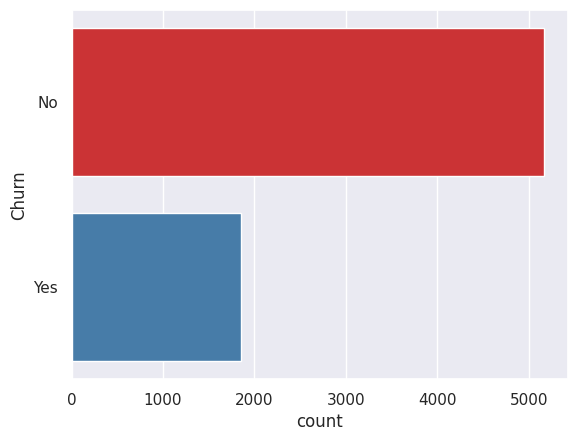

In [29]:
sns.set_theme(style="darkgrid", palette="Set1")
sns.countplot(data=data,y="Churn",orient='h')

In [30]:
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
categorical.remove('TotalCharges')

In [32]:
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 ['SeniorCitizens']]

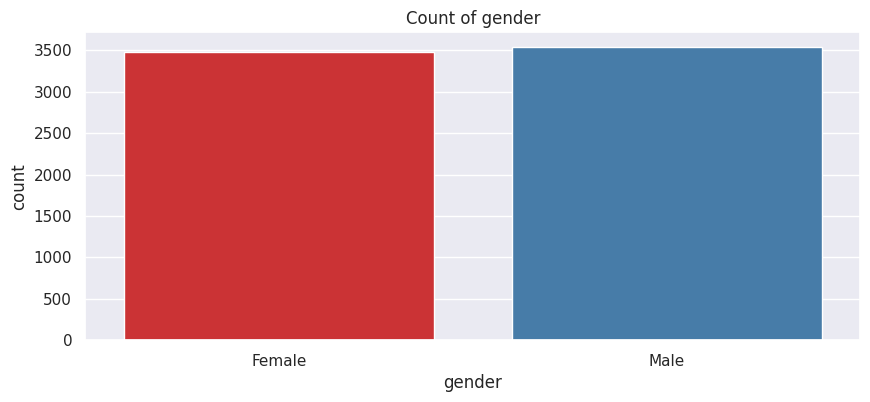

 -- 
----------------


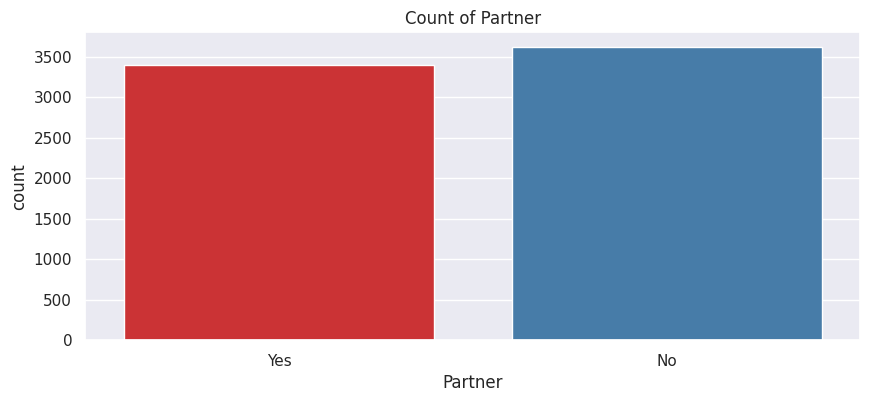

 -- 
----------------


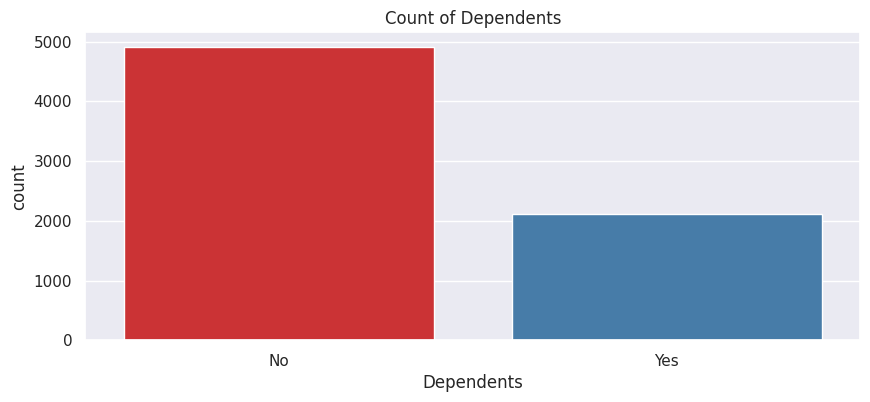

 -- 
----------------


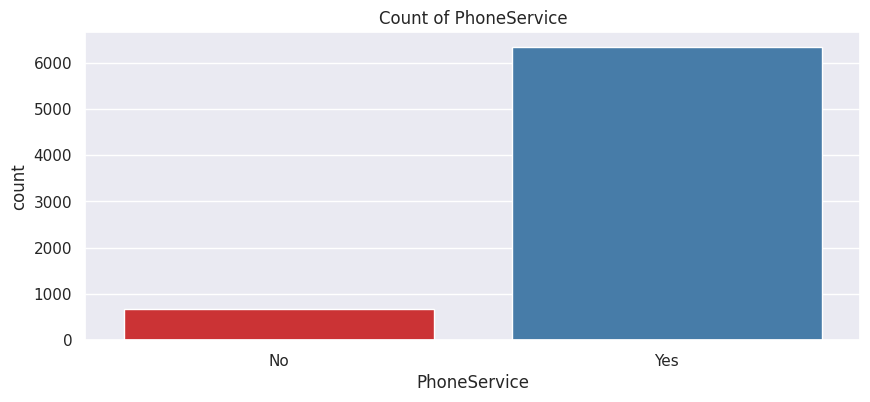

 -- 
----------------


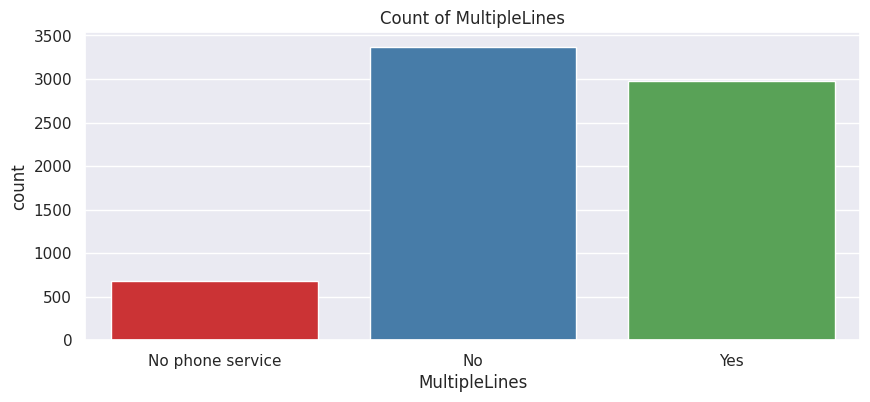

 -- 
----------------


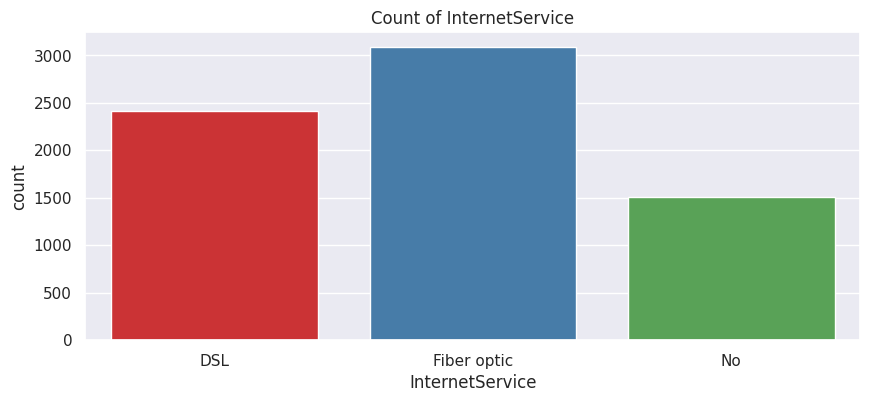

 -- 
----------------


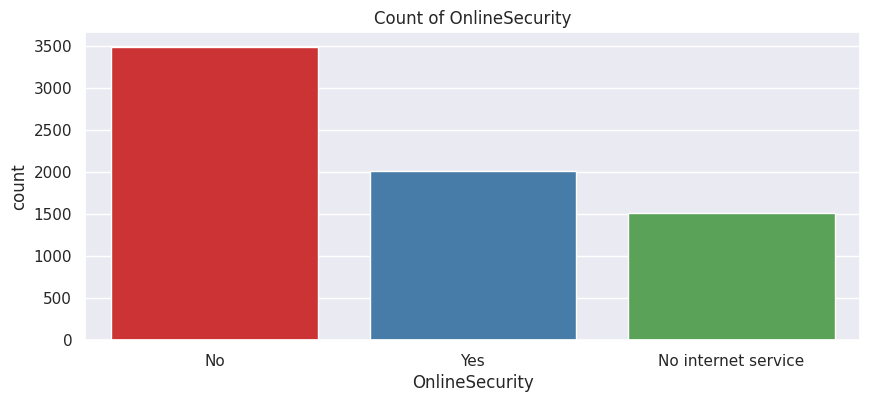

 -- 
----------------


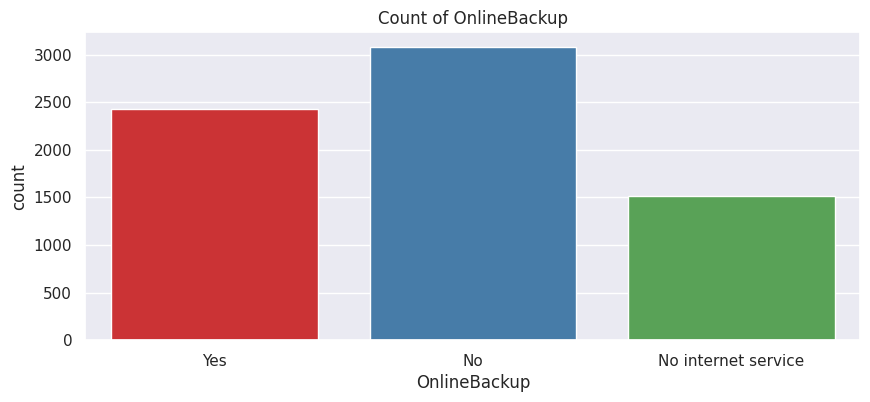

 -- 
----------------


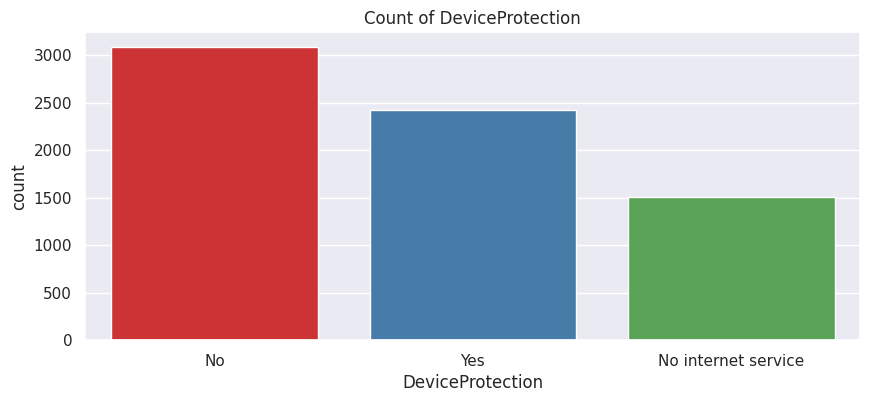

 -- 
----------------


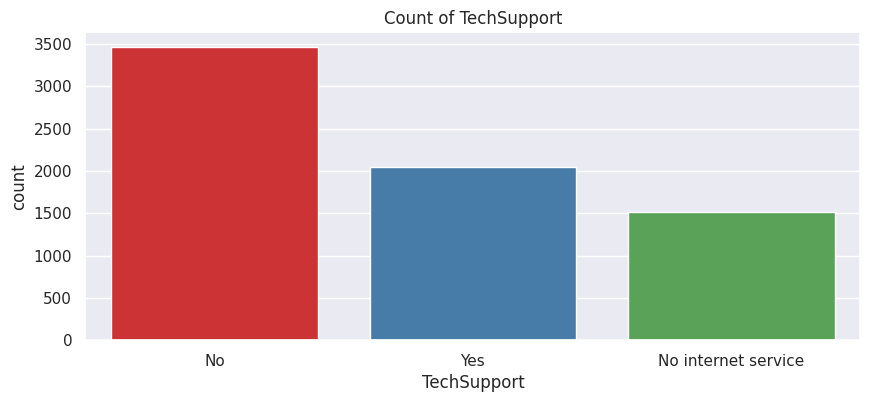

 -- 
----------------


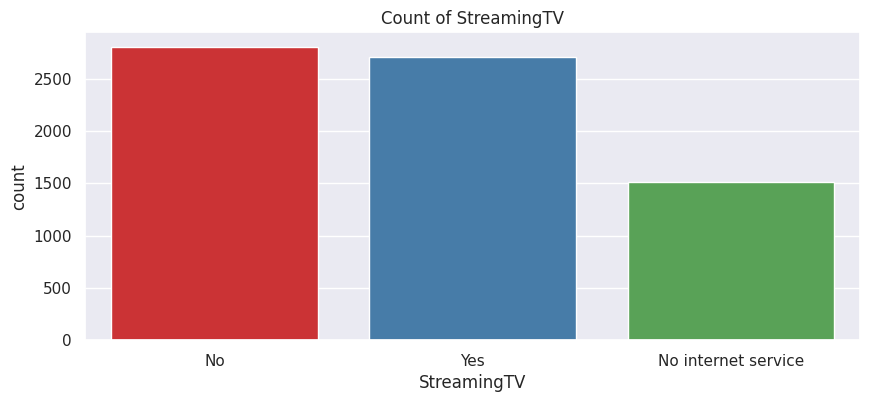

 -- 
----------------


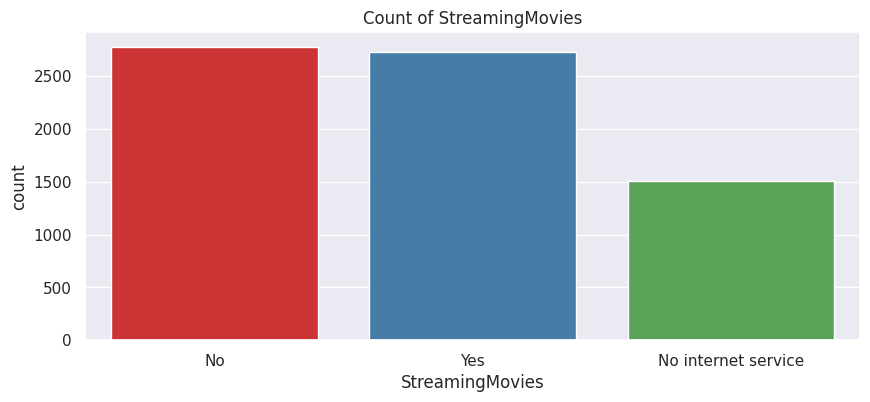

 -- 
----------------


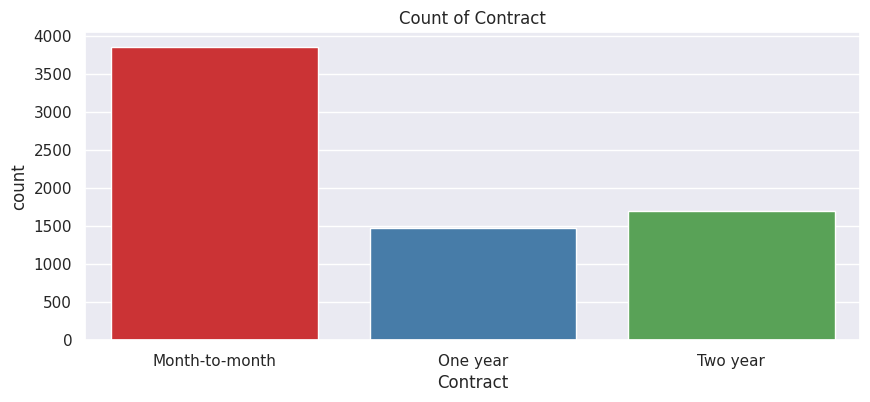

 -- 
----------------


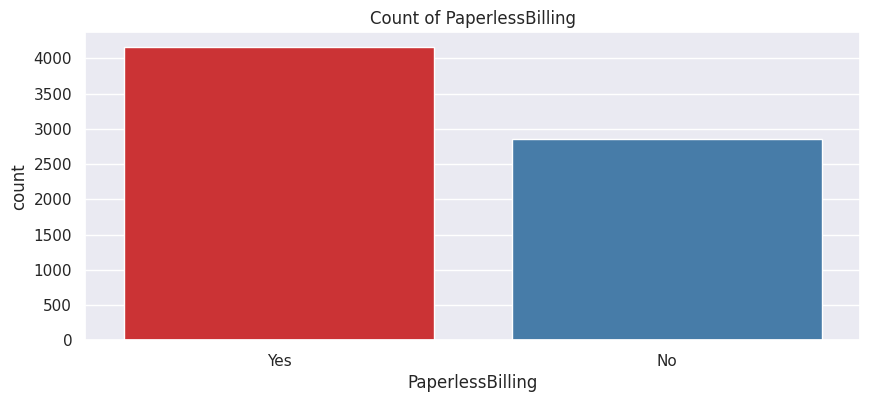

 -- 
----------------


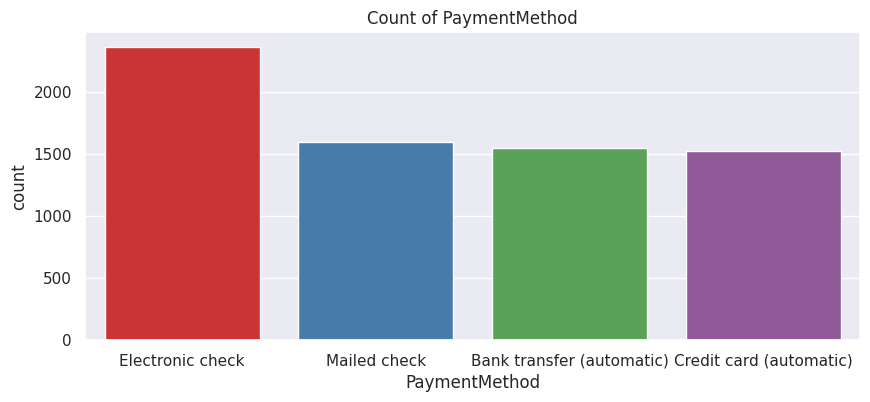

 -- 
----------------


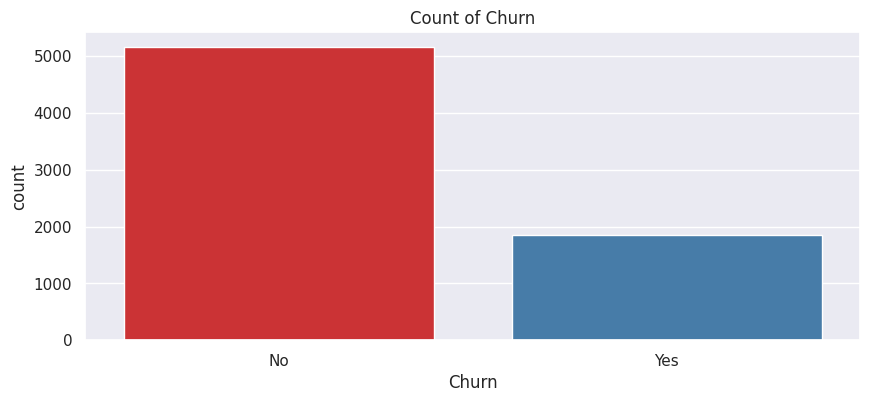

 -- 
----------------


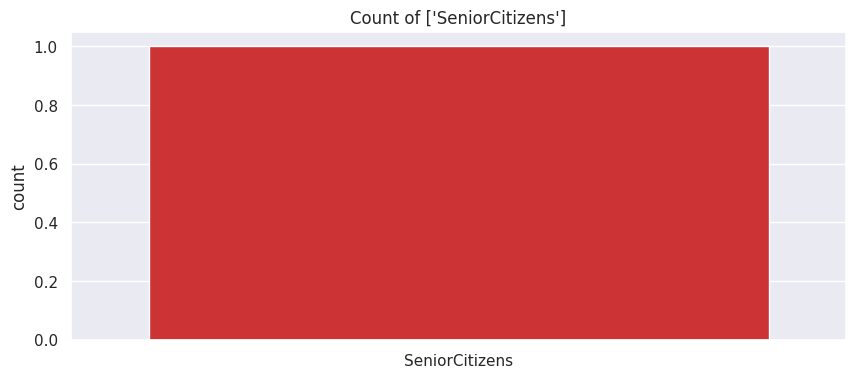

 -- 
----------------


In [38]:
for c in categorical:
  plt.figure(figsize=(10,4))
  sns.countplot(data=data, x=c)
  plt.title(f"Count of {c}")
  plt.show()
  print(" -- ")
  print("----------------")

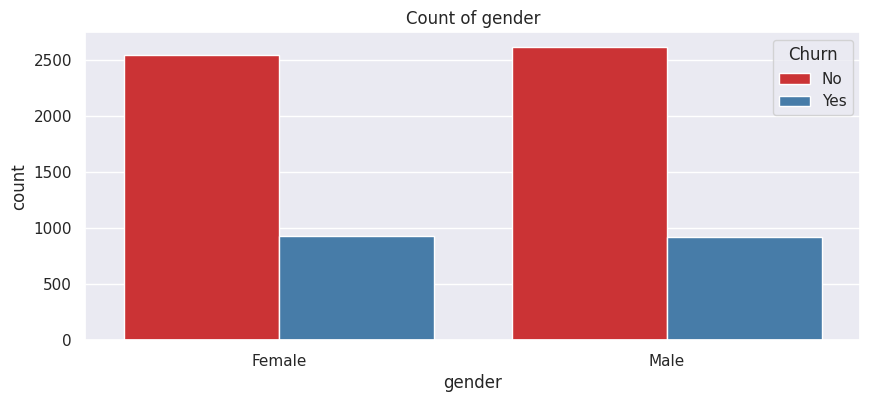

  
----------------


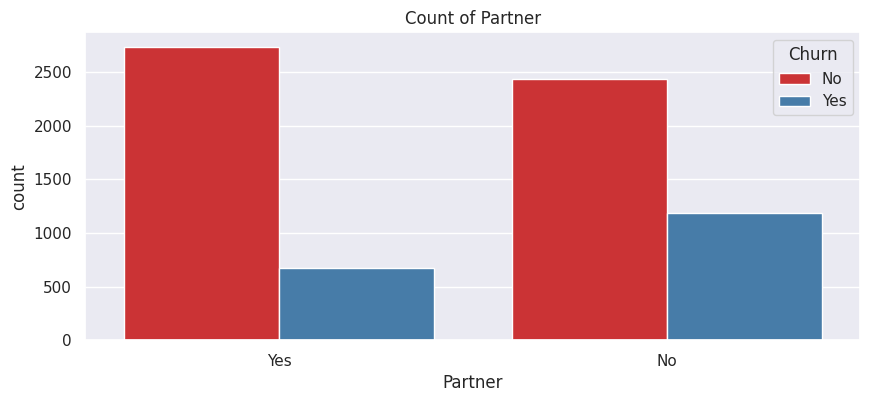

  
----------------


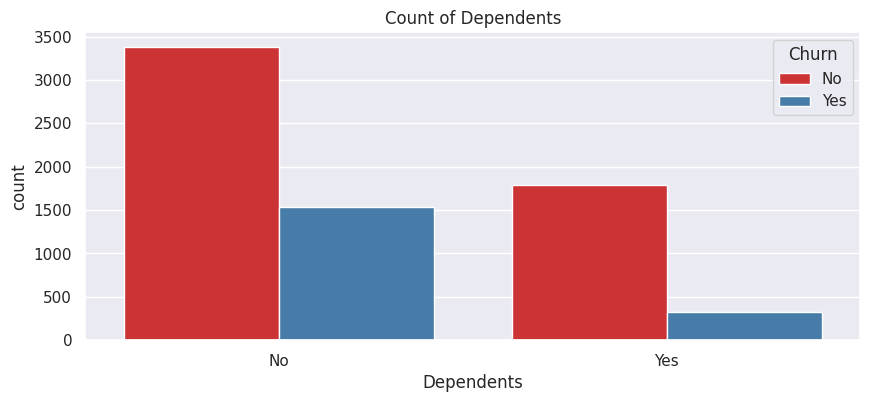

  
----------------


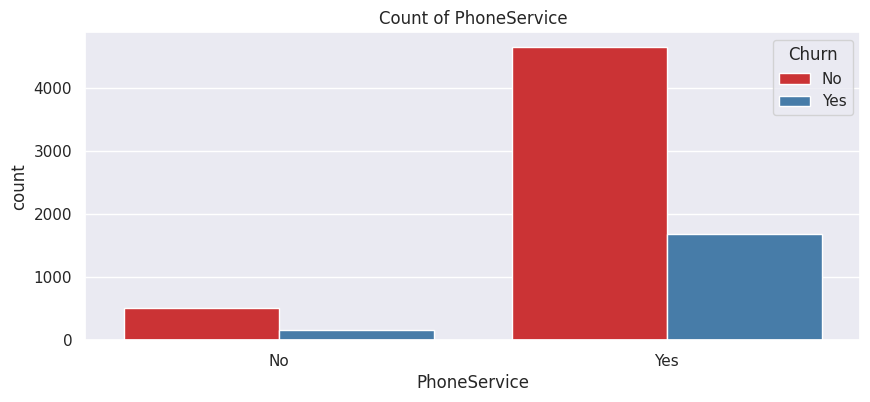

  
----------------


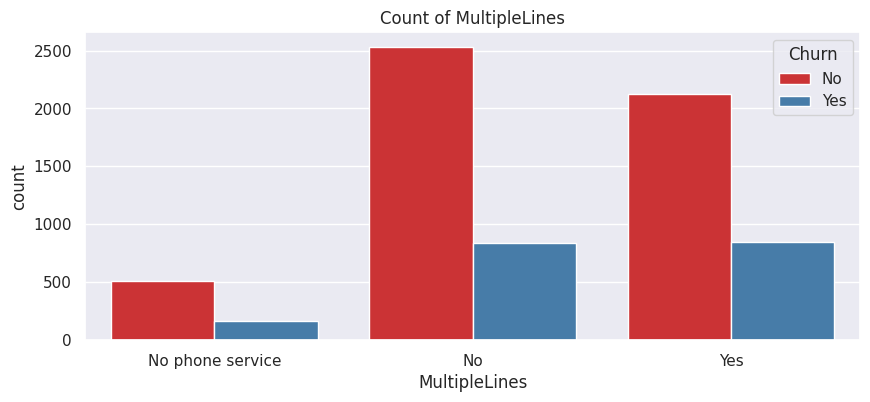

  
----------------


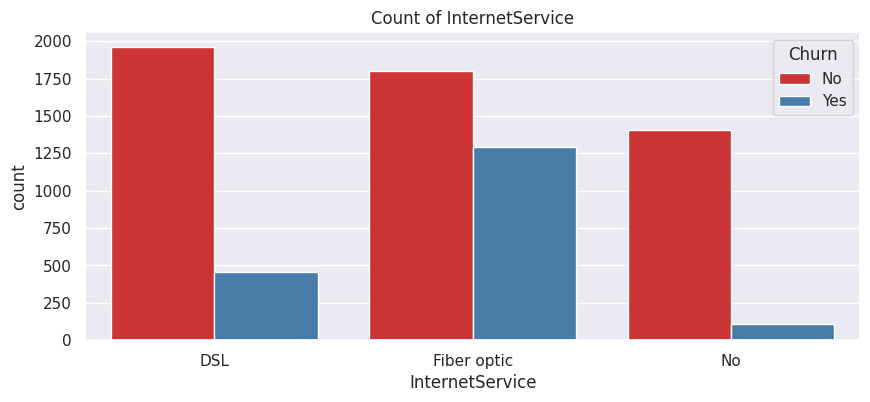

  
----------------


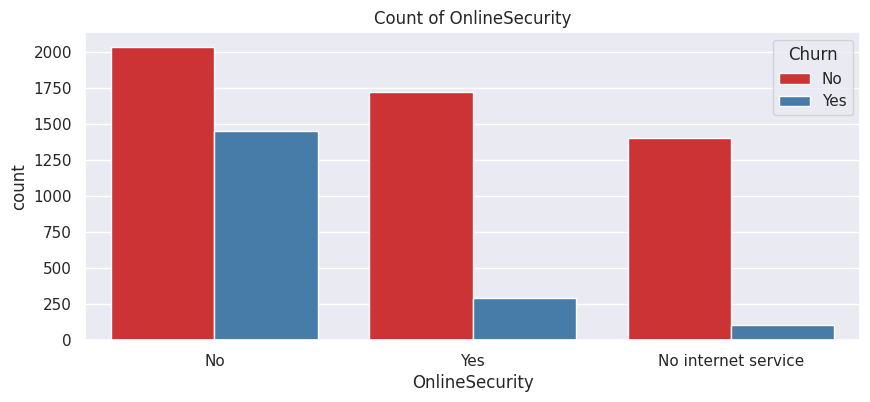

  
----------------


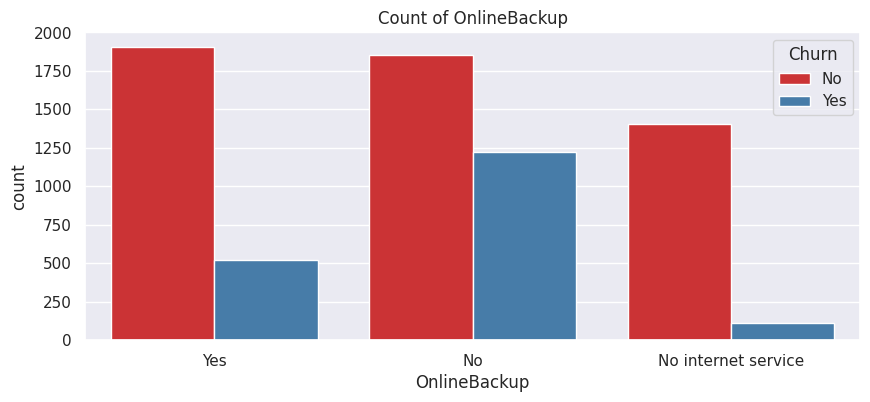

  
----------------


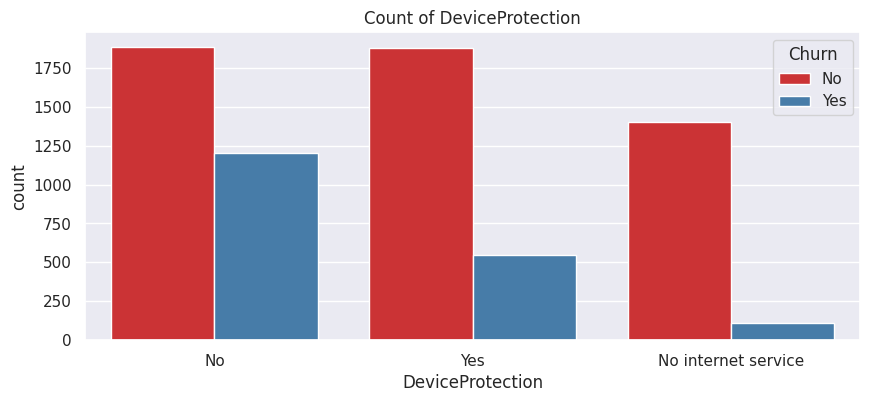

  
----------------


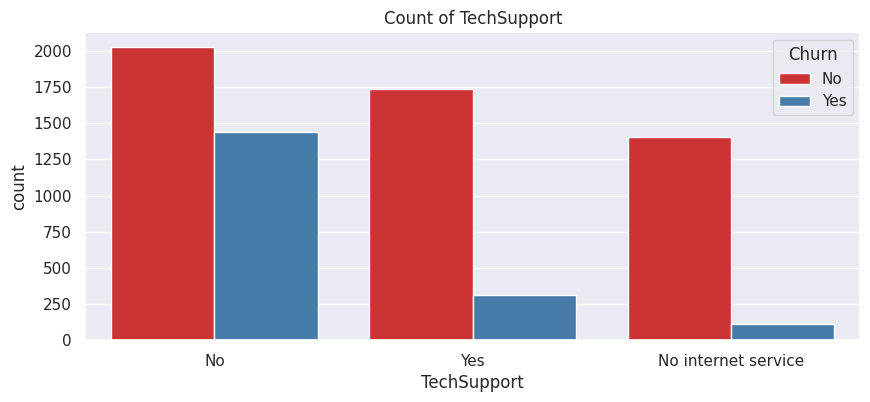

  
----------------


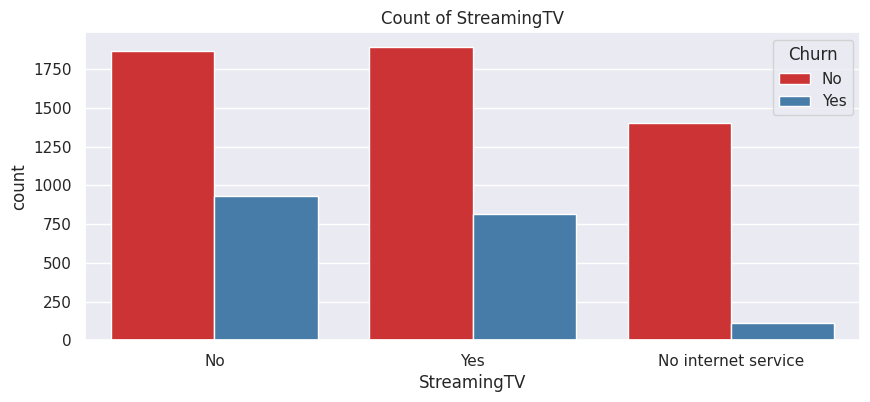

  
----------------


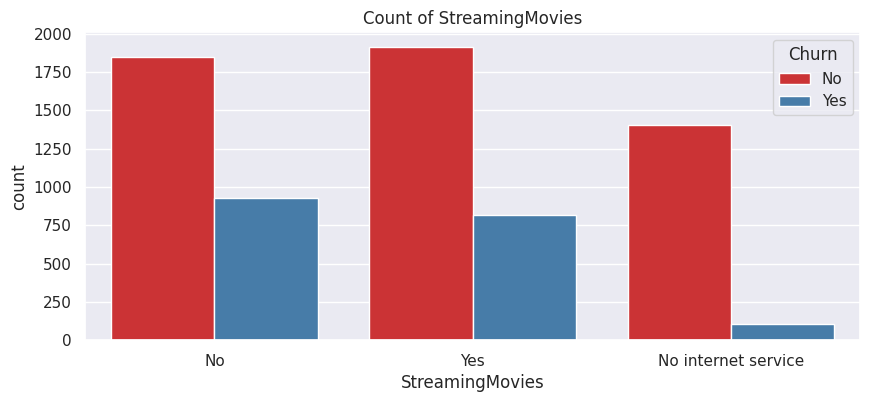

  
----------------


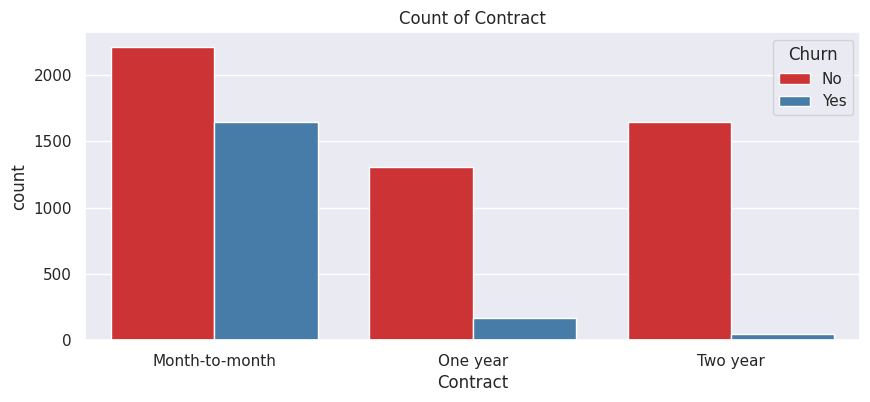

  
----------------


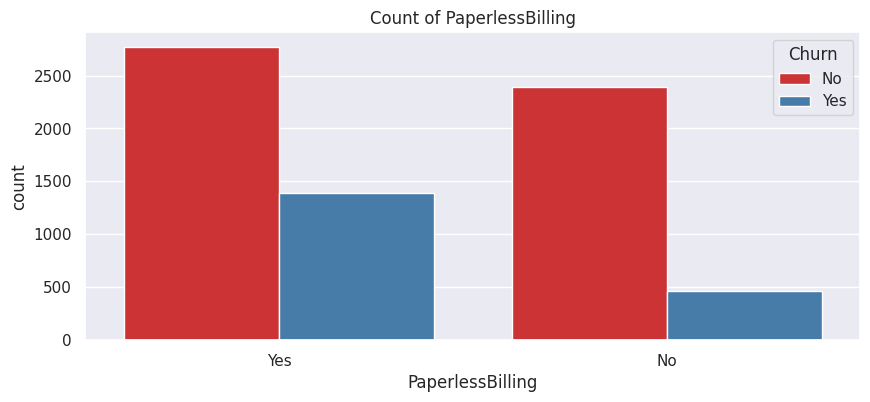

  
----------------


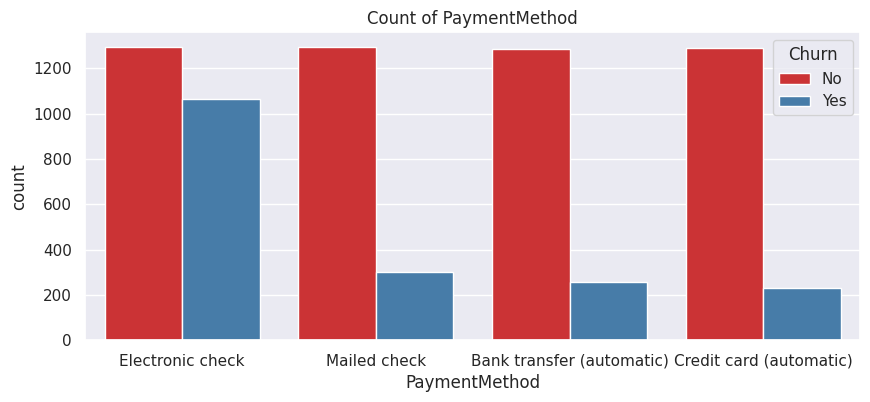

  
----------------


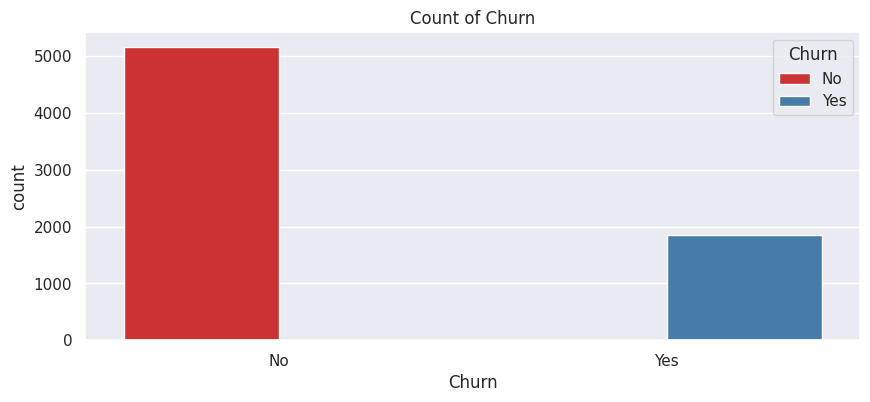

  
----------------


KeyError: ignored

<Figure size 1000x400 with 0 Axes>

In [36]:
for c in categorical:
  plt.figure(figsize=(10,4))
  sns.countplot(data=data, x=c, hue="Churn")
  plt.title(f"Count of {c}")
  plt.show()
  print("  ")
  print("----------------")

In [39]:
continious

['tenure', 'MonthlyCharges']

In [40]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [43]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')

In [44]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [45]:
continious.append('TotalCharges')

In [46]:
def kdeplot(feature):
  plt.figure(figsize=(9,4))
  plt.title(f"KDE plot {feature}")
  ax0 = sns.kdeplot(data[data.Churn=="No"][feature], label="Churn: No")
  ax1 = sns.kdeplot(data[data.Churn=="Yes"][feature], label = "Churn: Yes")
  plt.legend()
  plt.show()


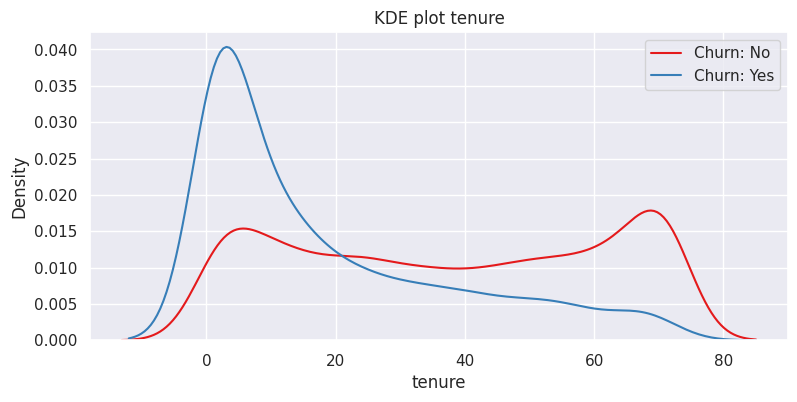

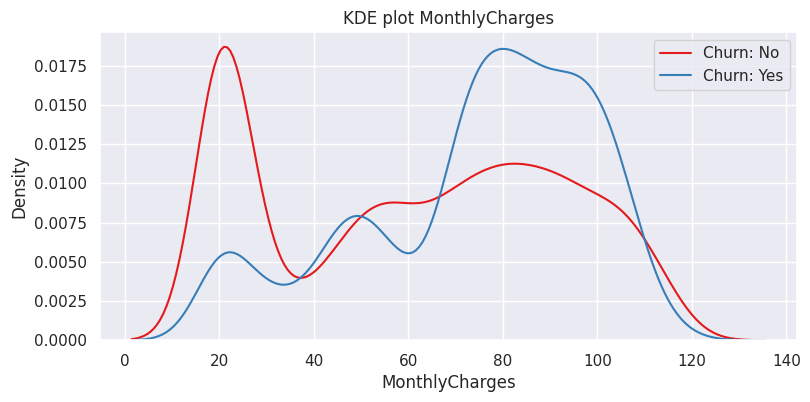

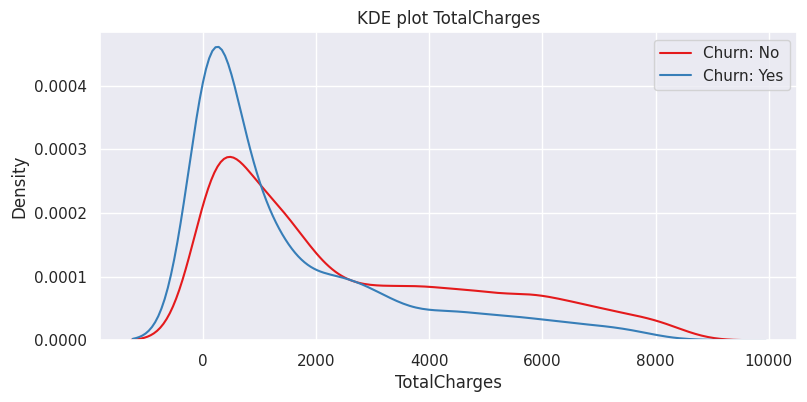

In [47]:
for co in continious:
  kdeplot(co)

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

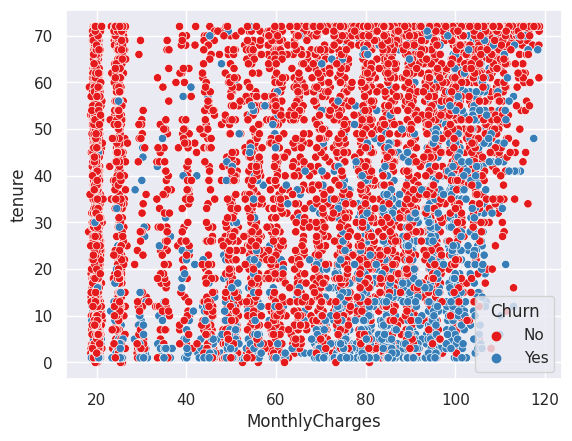

In [48]:
sns.scatterplot(data=data, x="MonthlyCharges", y="tenure", hue="Churn")

<Axes: xlabel='TotalCharges', ylabel='tenure'>

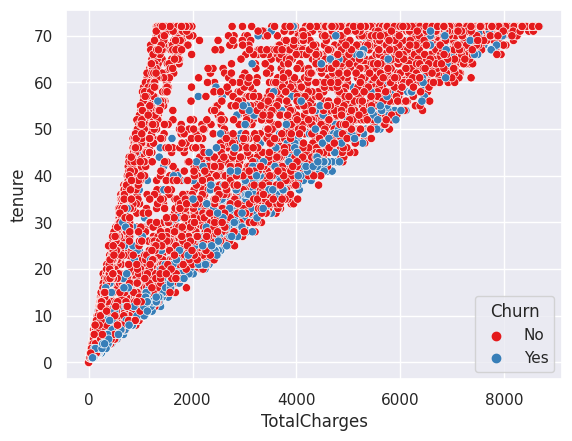

In [49]:
sns.scatterplot(data=data, x="TotalCharges", y="tenure", hue="Churn")

In [50]:
data.corr()

<ipython-input-50-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015349,0.219434,0.102243
tenure,0.015349,1.000000,0.245251,0.825595
MonthlyCharges,0.219434,0.245251,1.000000,0.650653
TotalCharges,0.102243,0.825595,0.650653,1.000000


In [67]:
x = data.drop(["Churn"], axis=1)
y = data["Churn"]

In [68]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

x['tenure'] = mmscaler.fit_transform(x[['tenure']])
x['TotalCharges'] = mmscaler.fit_transform(x[['TotalCharges']])
x['MonthlyCharges'] = mmscaler.fit_transform(x[['MonthlyCharges']])

In [69]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462


In [70]:
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 ['SeniorCitizens']]

In [72]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for c in categorical:
  encoder.fit(x[c])
  x[c] = encoder.transform(x[c])

  mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  print(c, ":", mapping)

gender : {'Female': 0, 'Male': 1}
Partner : {'No': 0, 'Yes': 1}
Dependents : {'No': 0, 'Yes': 1}
PhoneService : {'No': 0, 'Yes': 1}
MultipleLines : {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService : {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity : {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup : {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection : {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies : {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract : {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling : {'No': 0, 'Yes': 1}
PaymentMethod : {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


KeyError: ignored

In [73]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.229194
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847792
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.039892
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.035303


In [74]:
x.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,0.000747
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.102243
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.315452
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.060182
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.825595
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.114424
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.450888
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.173614
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.253211
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.374278


In [75]:
y = encoder.fit_transform(y)


In [76]:
len(y)

7021

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [78]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=10)

kbest.fit(x_train, y_train)

SelectKBest()

In [79]:
x_train_selected = x_train[x_train.columns[kbest.get_support()]]

In [80]:
x_test_selected = x_test[x_test.columns[kbest.get_support()]]

In [81]:
x_train.shape

(5616, 19)

In [82]:
y_train.shape

(5616,)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model1 = DecisionTreeClassifier()
model1.fit(x_train_selected, y_train)
ans1 = model1.predict(x_test_selected)

In [84]:
score1 =  accuracy_score(y_test, ans1)
score1*100

73.66548042704626

<Axes: >

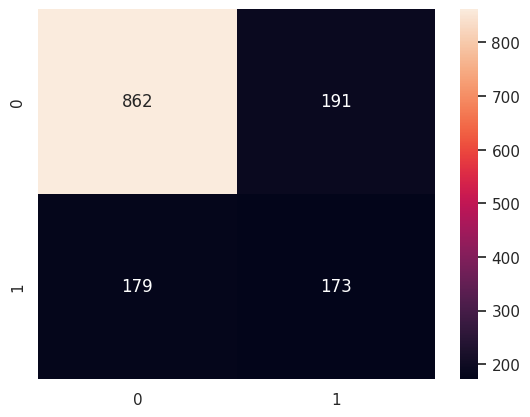

In [85]:
cm = confusion_matrix(y_test, ans1)
sns.heatmap(cm,annot=True, fmt='g')

In [86]:
print(classification_report(y_test, ans1))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1053
           1       0.48      0.49      0.48       352

    accuracy                           0.74      1405
   macro avg       0.65      0.66      0.65      1405
weighted avg       0.74      0.74      0.74      1405



In [87]:
from sklearn.ensemble import RandomForestClassifier
model2 =  RandomForestClassifier()
model2.fit(x_train_selected, y_train)
ans2 = model2.predict(x_test_selected)

In [88]:
score2 =  accuracy_score(y_test, ans2)
score2*100

78.57651245551601

<Axes: >

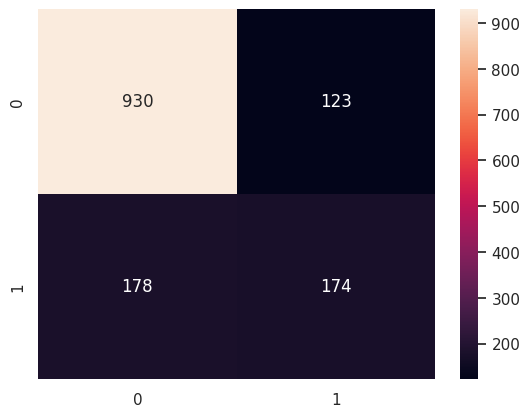

In [89]:
cm2 = confusion_matrix(y_test, ans2)
sns.heatmap(cm2,annot=True, fmt='g')

In [90]:
print(classification_report(y_test, ans2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1053
           1       0.59      0.49      0.54       352

    accuracy                           0.79      1405
   macro avg       0.71      0.69      0.70      1405
weighted avg       0.78      0.79      0.78      1405



<Axes: xlabel='Churn', ylabel='count'>

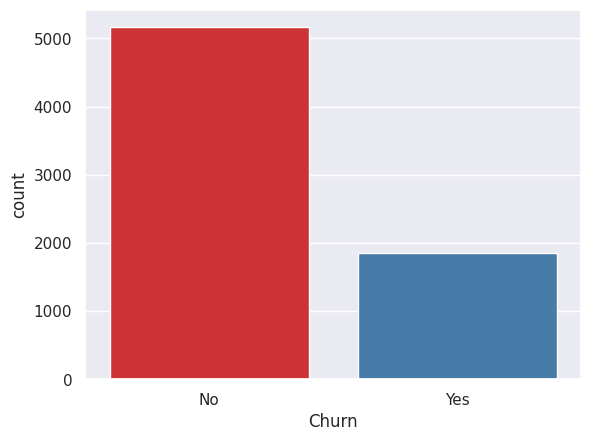

In [91]:
sns.countplot(data=data, x="Churn")

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
ros = RandomOverSampler(random_state=0)
x1,y1 = ros.fit_resample(x,y)

In [94]:
x1.shape

(10328, 19)

In [95]:
y1 = pd.Series(y1)
y1.value_counts()

0    5164
1    5164
dtype: int64

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=42)

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(f_classif, k=10)

kbest.fit(x_train, y_train)

SelectKBest()

In [98]:
x_train_selected = x_train[x_train.columns[kbest.get_support()]]

In [99]:
x_test_selected = x_test[x_test.columns[kbest.get_support()]]

In [100]:
x_train.shape

(8262, 19)

In [101]:
y_train.shape

(8262,)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model1 = DecisionTreeClassifier()
model1.fit(x_train_selected, y_train)
ans1 = model1.predict(x_test_selected)

In [103]:
score1 =  accuracy_score(y_test, ans1)
score1*100

86.49564375605033

<Axes: >

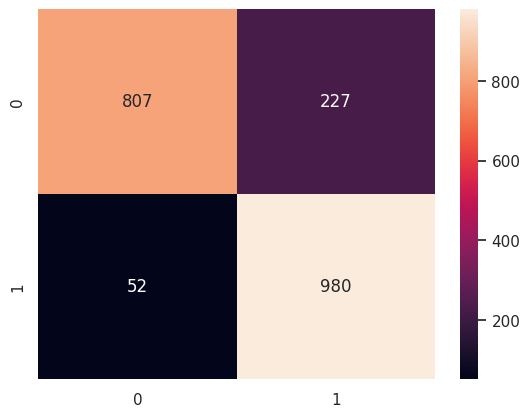

In [104]:
cm = confusion_matrix(y_test, ans1)
sns.heatmap(cm,annot=True, fmt='g')

In [105]:
print(classification_report(y_test, ans1))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1034
           1       0.81      0.95      0.88      1032

    accuracy                           0.86      2066
   macro avg       0.88      0.87      0.86      2066
weighted avg       0.88      0.86      0.86      2066



In [106]:
from sklearn.ensemble import RandomForestClassifier
model2 =  RandomForestClassifier()
model2.fit(x_train_selected, y_train)
ans2 = model2.predict(x_test_selected)

In [107]:
score2 =  accuracy_score(y_test, ans2)
score2*100

88.77057115198451

<Axes: >

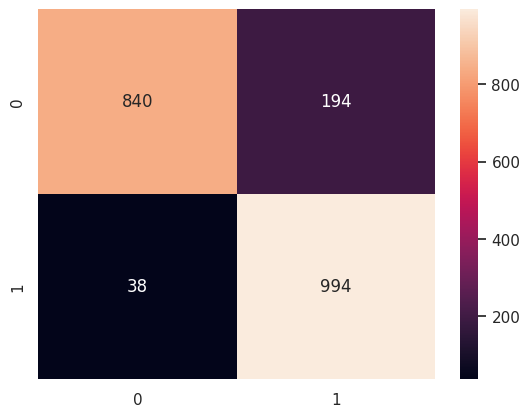

In [108]:
cm2 = confusion_matrix(y_test, ans2)
sns.heatmap(cm2,annot=True, fmt='g')

In [109]:
print(classification_report(y_test, ans2))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1034
           1       0.84      0.96      0.90      1032

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
param_grid = {
    'n_estimators':[100,200,300,400,500],
    'max_depth':[None, 10,20,30, 40],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True, False]
}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(x_train_selected, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [113]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'bootstrap': False}

In [114]:
ans3 = rf_random.best_estimator_.predict(x_test_selected)

In [115]:
score3 =  accuracy_score(y_test, ans3)
score3*100

89.64181994191675

<Axes: >

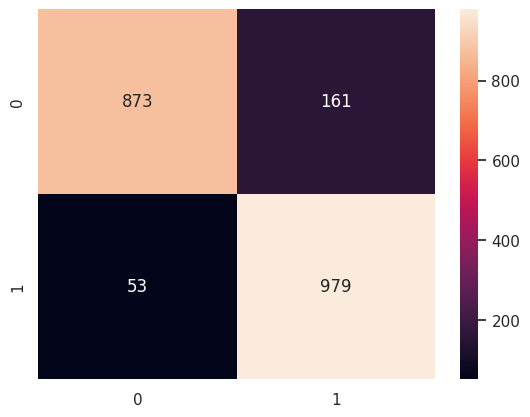

In [116]:
cm3 = confusion_matrix(y_test, ans3)
sns.heatmap(cm3,annot=True, fmt='g')

In [117]:
print(classification_report(y_test, ans3))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1034
           1       0.86      0.95      0.90      1032

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066



In [119]:
"""gender : {'Female': 0, 'Male': 1}
Partner : {'No': 0, 'Yes': 1}
Dependents : {'No': 0, 'Yes': 1}
PhoneService : {'No': 0, 'Yes': 1}
MultipleLines : {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService : {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity : {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup : {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection : {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies : {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract : {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling : {'No': 0, 'Yes': 1}
PaymentMethod : {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
SeniorCitizen : {0: 0, 1: 1}"""

"gender : {'Female': 0, 'Male': 1}\nPartner : {'No': 0, 'Yes': 1}\nDependents : {'No': 0, 'Yes': 1}\nPhoneService : {'No': 0, 'Yes': 1}\nMultipleLines : {'No': 0, 'No phone service': 1, 'Yes': 2}\nInternetService : {'DSL': 0, 'Fiber optic': 1, 'No': 2}\nOnlineSecurity : {'No': 0, 'No internet service': 1, 'Yes': 2}\nOnlineBackup : {'No': 0, 'No internet service': 1, 'Yes': 2}\nDeviceProtection : {'No': 0, 'No internet service': 1, 'Yes': 2}\nTechSupport : {'No': 0, 'No internet service': 1, 'Yes': 2}\nStreamingTV : {'No': 0, 'No internet service': 1, 'Yes': 2}\nStreamingMovies : {'No': 0, 'No internet service': 1, 'Yes': 2}\nContract : {'Month-to-month': 0, 'One year': 1, 'Two year': 2}\nPaperlessBilling : {'No': 0, 'Yes': 1}\nPaymentMethod : {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}\nSeniorCitizen : {0: 0, 1: 1}"

In [122]:
inp

[1, 3, 0, 0, 0, 0, 4, 1, 120, 2000]

In [121]:
import numpy as np
inp = []
for a in x_train_selected.columns:
  f = int(input(f"enter {a}: "))
  inp.append(f)

i_array = np.asarray(inp)
i_array = i_array.reshape(1,-1)
result = rf_random.best_estimator_.predict(i_array)
print(f"Result from model: {result}")
if result[0]==0:
  print("Chances of Churn: No")
else:
  print("Chances of Churn : Yes")

enter Dependents: 1
enter tenure: 3
enter OnlineSecurity: 0
enter OnlineBackup: 0
enter DeviceProtection: 0
enter TechSupport: 0
enter Contract: 4
enter PaperlessBilling: 1
enter MonthlyCharges: 120
enter TotalCharges: 2000
Result from model: [0]
Chances of Churn: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
